In [1]:
# 보스턴 하우스 프라이스 -> 규제 등등 내용 참고 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

from sklearn.datasets import load_boston


# DataLoad

In [2]:
data_dict=load_boston()

In [3]:
df = pd.DataFrame(data=data_dict['data'], columns=data_dict['feature_names'] )
df['price'] = data_dict['target']
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [4]:
# col_list = [col.lower() for col in df.columns.tolist()]
# df.columns = col_list

df.columns = [col.lower() for col in df.columns.tolist()]
df.head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


# 머신러닝으로 RMSE 점수 보기

In [5]:
y = df["price"]
X = df.drop(["price"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
model = LGBMRegressor()

model.fit(X_train, y_train)
pred = model.predict(X_test)

rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE:{rmse:.4f}")

RMSE:2.7499


# 딥러닝으로 RMSE 점수 보기

In [6]:
# ! pip install tensorflow
# ! pip install keras            # 분석을 위한 tensorflow 내 백엔드엔진

In [7]:
# !pip install tensorflow

In [8]:
import tensorflow as tf
from keras.models import Sequential  # layer 쌓았을 때 다 쌓은 상자가 Sequential
from keras.layers import Dense, Activation

## RandomSeed 언제나 일정하게 고정

In [9]:
np.random.seed(1024)
tf.random.set_seed(1024)

## data 확인

In [10]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
y=df['price']
X=df.drop(['price'], axis=1)

In [12]:
print(X.shape, y.shape)

(506, 13) (506,)


## 딥러닝은 모델 돌릴 때 임의로 train, test set 나눌 필요 없이 모델 내에서 나눠서 쓴다.

In [13]:
model=Sequential() # 전체를 감싸는 모델

# 모델 내에 레이어, Dense를 더해준다.
model.add(Dense(units=20, activation='relu', input_dim=13)) # input layer   # input_dim은 input에만 쓴다.
model.add(Dense(units=8, activation='relu'))                # hidden layer1
model.add(Dense(units=8, activation='relu'))                # hidden layer2
model.add(Dense(units=4, activation='relu'))                # hidden layer3
model.add(Dense(units=1))                                   # output layer # 회귀니까 activation 없이. unit=1(집값)

In [14]:
model.summary() # 561 비트(?)로 학습

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 8)                 168       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [15]:
# compiler 에서 설정할 것 : lom설정(그냥 앞글자 따서)
model.compile(loss='mse', # mean_squared_error라고 써도 된다.
              optimizer="adam", #rmsprop
             # metrics="rmse" # 회귀는 loss가 곧 metrics라 안 쓴다.
             )


In [16]:
model.fit(X,y,                 # train, validation 따로 할 것 없이 통째로 줘도 된다.
    epochs=100,
    validation_split=0.2
    # batch_size=None,
    # callbacks=None,
    # validation_data
    )

Epoch 1/100
13/13 [==============================] - 1s 22ms/step - loss: 266.5533 - val_loss: 496.1925
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 183.7287 - val_loss: 394.4895
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 132.3009 - val_loss: 361.9778
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 121.5898 - val_loss: 320.5695
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 116.3410 - val_loss: 290.0899
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 109.7095 - val_loss: 258.8797
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 103.2391 - val_loss: 238.4263
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 101.2846 - val_loss: 209.5792
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 99.8560 - val_loss: 191.6425
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss:

In [17]:
np.sqrt(21.3510)

4.6207142305059286

In [18]:
# ----- loss, mse, val_loss, val_mse (단, val_어쩌고는 validation 줬을 경우.)
model.evaluate(X,y)

16/16 [==============================] - 0s 1ms/step - loss: 29.9665


29.966510772705078

## 오버피팅 확인

In [19]:
# 점수를 담아라. -> 변수에 담아주면 된다.
res=model.fit(X,y,
    epochs=100,
    validation_split=0.2
    )

Epoch 1/100
13/13 [==============================] - 0s 8ms/step - loss: 23.3026 - val_loss: 63.4650
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 24.3839 - val_loss: 60.4348
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 24.2033 - val_loss: 57.7116
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 25.2768 - val_loss: 60.3228
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 23.0573 - val_loss: 58.6871
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 27.7017 - val_loss: 60.3811
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 24.8391 - val_loss: 56.5997
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 26.4158 - val_loss: 57.9328
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 23.1664 - val_loss: 55.6950
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 26.4142 - val_los

In [20]:
res.history['loss'] # dict에 담김
res.history['val_loss']

[63.465030670166016,
 60.43483352661133,
 57.71160125732422,
 60.322776794433594,
 58.687068939208984,
 60.38105010986328,
 56.59969711303711,
 57.93278503417969,
 55.695045471191406,
 56.0444450378418,
 54.0131721496582,
 58.936805725097656,
 56.179473876953125,
 54.75944137573242,
 54.65508270263672,
 69.29946899414062,
 57.25355529785156,
 55.04002380371094,
 58.055320739746094,
 65.69949340820312,
 63.02972412109375,
 59.59699249267578,
 60.25038146972656,
 58.83747100830078,
 55.3798942565918,
 55.5236930847168,
 57.545223236083984,
 54.49400329589844,
 56.2840461730957,
 56.28528594970703,
 57.01183319091797,
 58.40043258666992,
 55.293270111083984,
 55.177467346191406,
 56.68404769897461,
 54.865474700927734,
 56.1534538269043,
 60.66242980957031,
 59.72956466674805,
 55.81687927246094,
 57.71018981933594,
 56.08729553222656,
 56.63446044921875,
 56.738792419433594,
 60.46246337890625,
 56.92638397216797,
 64.92731475830078,
 56.00871658325195,
 61.200809478759766,
 59.288135528

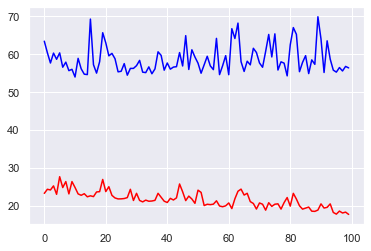

In [21]:
plt.plot(np.arange(len(res.history['loss'])), res.history['loss'], c='red', label='loss')
plt.plot(np.arange(len(res.history['val_loss'])), res.history['val_loss'], c='blue', label='val_loss')
plt.show()

# 과제
타이타닉 데이터셋 이용 → 뉴럴네트워크 이용해서 accuracy 점수 내고 차트 그려오기

In [22]:
# tianic dataset after engineering
ttnic = pd.read_csv('dataset/titanic.csv')

In [23]:
ttnic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex
0,0,3,22,1,0,7.2500,0,1,1
1,1,1,38,1,0,71.2833,3,2,0
2,1,3,26,0,0,7.9250,0,1,0
3,1,1,35,1,0,53.1000,3,1,0
4,0,3,35,0,0,8.0500,0,1,1


In [24]:
X=ttnic.drop('Survived', axis=1)
y=ttnic['Survived']

In [25]:
print(X.shape, y.shape)

(891, 8) (891,)


In [44]:
model1=Sequential() # 전체를 감싸는 모델

# 모델 내에 레이어, Dense를 더해준다.relu
model1.add(Dense(units=82, activation='relu', input_dim=8)) # input layer   # input_dim은 input에만 쓴다.
model1.add(Dense(units=43, activation='relu'))                # hidden layer1
model1.add(Dense(units=32, activation='relu'))                # hidden layer2
model1.add(Dense(units=14, activation='relu'))                # hidden layer3
model1.add(Dense(units=1, activation='sigmoid'))  

In [45]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 82)                738       
                                                                 
 dense_21 (Dense)            (None, 43)                3569      
                                                                 
 dense_22 (Dense)            (None, 32)                1408      
                                                                 
 dense_23 (Dense)            (None, 14)                462       
                                                                 
 dense_24 (Dense)            (None, 1)                 15        
                                                                 
Total params: 6,192
Trainable params: 6,192
Non-trainable params: 0
_________________________________________________________________


In [46]:
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [47]:
res1=model1.fit(X,y,
            epochs=200,
            validation_split=0.2
          )

Epoch 1/200
23/23 [==============================] - 1s 12ms/step - loss: 0.7602 - accuracy: 0.6489 - val_loss: 0.5686 - val_accuracy: 0.7263
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 0.6235 - accuracy: 0.6854 - val_loss: 0.5502 - val_accuracy: 0.7263
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 0.6089 - accuracy: 0.6854 - val_loss: 0.5904 - val_accuracy: 0.7318
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 0.6120 - accuracy: 0.6868 - val_loss: 0.5372 - val_accuracy: 0.7430
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 0.6104 - accuracy: 0.6770 - val_loss: 0.5309 - val_accuracy: 0.7598
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5915 - accuracy: 0.6952 - val_loss: 0.5120 - val_accuracy: 0.7374
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5853 - accuracy: 0.6910 - val_loss: 0.5250 - val_accuracy: 0.7542
Epoch 8/200


In [48]:
model1.evaluate(X,y)

28/28 [==============================] - 0s 1ms/step - loss: 0.3516 - accuracy: 0.8541


[0.3516044318675995, 0.854096531867981]

In [49]:
res1.history['loss']
res1.history['val_loss']

[0.5686248540878296,
 0.5502167344093323,
 0.5904468297958374,
 0.5372231602668762,
 0.5308876037597656,
 0.5119905471801758,
 0.5249853134155273,
 0.5392168760299683,
 0.4991908073425293,
 0.47763773798942566,
 0.47711071372032166,
 0.48422476649284363,
 0.48033249378204346,
 0.46779173612594604,
 0.4662667512893677,
 0.4422471821308136,
 0.4518422782421112,
 0.42269113659858704,
 0.4108782410621643,
 0.4363355040550232,
 0.39387887716293335,
 0.4327724277973175,
 0.3859076499938965,
 0.3741239011287689,
 0.3774968087673187,
 0.38561731576919556,
 0.3919694721698761,
 0.4367870092391968,
 0.39926090836524963,
 0.42867496609687805,
 0.38667675852775574,
 0.43220680952072144,
 0.3867798149585724,
 0.3992924094200134,
 0.3956499695777893,
 0.3865795135498047,
 0.3750956952571869,
 0.3808192312717438,
 0.46149343252182007,
 0.3870093524456024,
 0.4399663805961609,
 0.37900108098983765,
 0.3899340033531189,
 0.39785194396972656,
 0.37378790974617004,
 0.3602484464645386,
 0.378251105546951

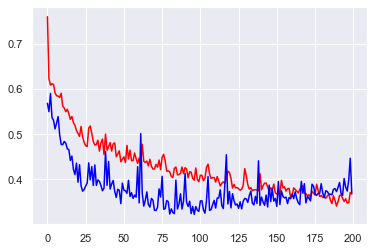

In [50]:
plt.plot(np.arange(len(res1.history['loss'])), res1.history['loss'], c='red', label='loss')
plt.plot(np.arange(len(res1.history['val_loss'])), res1.history['val_loss'], c='blue', label='val_loss')
plt.legend()
plt.show()

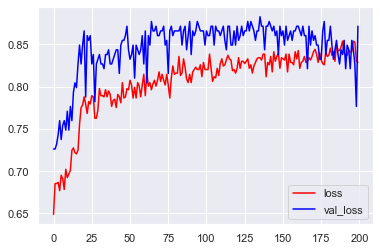

In [52]:
plt.plot(np.arange(len(res1.history['accuracy'])), res1.history['accuracy'], c='red', label='loss')
plt.plot(np.arange(len(res1.history['val_accuracy'])), res1.history['val_accuracy'], c='blue', label='val_loss')
plt.legend()
plt.show()